# Task 6.4 - Supervised Machine Learning - Regression

## This Script contains the following:

### Importing Data Libraries
### Data Cleaning 
### Exploration for Regression Analysis
### Hypothesis
### Observations
### Final Thoughts


## 1. Importing Data Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Graphs created to be displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
# Set path
path = r'C:\Users\asus\Exercise 6.4A'

In [13]:
# import dataframe

df = pd.read_csv(os.path.join(path, 'Data', 'FBI human trafficking files per state 2013-2022 CLEANED.csv '), index_col = False)

In [14]:
df.columns

Index(['DATA_YEAR', 'AGENCY_TYPE_NAME', 'STATE_ABBR', 'STATE_NAME',
       'COUNTY_NAME', 'REGION_NAME', 'POPULATION_GROUP_CODE',
       'POPULATION_GROUP_DESC', 'OFFENSE_NAME', 'OFFENSE_SUBCAT_NAME',
       'ACTUAL_COUNT'],
      dtype='object')

In [15]:
df.head(20)

,DATA_YEAR,AGENCY_TYPE_NAME,STATE_ABBR,STATE_NAME,COUNTY_NAME,REGION_NAME,POPULATION_GROUP_CODE,POPULATION_GROUP_DESC,OFFENSE_NAME,OFFENSE_SUBCAT_NAME,ACTUAL_COUNT
0,2013,County,MO,Missouri,ST LOUIS,Midwest,9A,"MSA counties 100,000 or over",Human Trafficking,Commercial Sex Acts,6
1,2013,County,OH,Ohio,ALLEN,Midwest,9C,"MSA counties from 10,000 thru 24,999",Human Trafficking,Commercial Sex Acts,1
2,2013,County,OH,Ohio,ALLEN,Midwest,9C,"MSA counties from 10,000 thru 24,999",Human Trafficking,Involuntary Servitude,1
3,2013,City,TN,Tennessee,"HAMBLEN, JEFFERSON",South,4,"Cities from 25,000 thru 49,999",Human Trafficking,Commercial Sex Acts,1
4,2013,City,TN,Tennessee,SHELBY,South,1B,"Cities from 500,000 thru 999,999",Human Trafficking,Commercial Sex Acts,3
5,2013,City,WA,Washington,KING,West,3,"Cities from 50,000 thru 99,999",Human Trafficking,Commercial Sex Acts,2
6,2014,City,AK,Alaska,ANCHORAGE,West,1C,"Cities from 250,000 thru 499,999",Human Trafficking,Commercial Sex Acts,2
7,2014,State Police,AK,Alaska,NOT SPECIFIED,West,8A,"Non-MSA counties 100,000 or over",Human Trafficking,Commercial Sex Acts,9
8,2014,City,AZ,Arizona,MARICOPA,West,3,"Cities from 50,000 thru 99,999",Human Trafficking,Commercial Sex Acts,2
9,2014,City,AZ,Arizona,MARICOPA,West,2,"Cities from 100,000 thru 249,999",Human Trafficking,Commercial Sex Acts,1


In [17]:
df.shape

(3894, 11)

## 2. Data Cleaning

In [21]:
df.dtypes

DATA_YEAR                 int64
AGENCY_TYPE_NAME         object
STATE_ABBR               object
STATE_NAME               object
COUNTY_NAME              object
REGION_NAME              object
POPULATION_GROUP_CODE    object
POPULATION_GROUP_DESC    object
OFFENSE_NAME             object
OFFENSE_SUBCAT_NAME      object
ACTUAL_COUNT              int64
dtype: object

In [22]:
# create data subset for df dataframe

dfsub = df.drop(['STATE_ABBR', 'COUNTY_NAME', 'POPULATION_GROUP_CODE', 'POPULATION_GROUP_DESC' ], axis = 1)

In [23]:
dfsub.head()

,DATA_YEAR,AGENCY_TYPE_NAME,STATE_NAME,REGION_NAME,OFFENSE_NAME,OFFENSE_SUBCAT_NAME,ACTUAL_COUNT
0,2013,County,Missouri,Midwest,Human Trafficking,Commercial Sex Acts,6
1,2013,County,Ohio,Midwest,Human Trafficking,Commercial Sex Acts,1
2,2013,County,Ohio,Midwest,Human Trafficking,Involuntary Servitude,1
3,2013,City,Tennessee,South,Human Trafficking,Commercial Sex Acts,1
4,2013,City,Tennessee,South,Human Trafficking,Commercial Sex Acts,3


In [25]:
# change data types in dfsub from object to category in roder to better serve the exercise

dfsub['AGENCY_TYPE_NAME'] = dfsub['AGENCY_TYPE_NAME'].astype('category').cat.codes
dfsub['STATE_NAME'] = dfsub['STATE_NAME'].astype('category').cat.codes
dfsub['OFFENSE_SUBCAT_NAME'] = dfsub['OFFENSE_SUBCAT_NAME'].astype('category').cat.codes
dfsub['REGION_NAME'] = dfsub['REGION_NAME'].astype('category').cat.codes
dfsub['OFFENSE_NAME'] = dfsub['OFFENSE_NAME'].astype('category').cat.codes

In [26]:
dfsub.dtypes

DATA_YEAR              int64
AGENCY_TYPE_NAME        int8
STATE_NAME              int8
REGION_NAME             int8
OFFENSE_NAME            int8
OFFENSE_SUBCAT_NAME     int8
ACTUAL_COUNT           int64
dtype: object

In [27]:
# rename columns for shorter, clearer names
dfsub.rename(columns = {'DATA_YEAR' : 'Year', 'AGENCY_TYPE_NAME' : 'Agency Type', 'STATE_NAME' : 'State', 'REGION_NAME' : 'Region', 'OFFENSE_NAME' : 'Offense', 'OFFENSE_SUBCAT_NAME' : 'Offense Subcat', 'ACTUAL_COUNT' : 'Offense Count' }, inplace = True)

In [28]:
dfsub.dtypes

Year              int64
Agency Type        int8
State              int8
Region             int8
Offense            int8
Offense Subcat     int8
Offense Count     int64
dtype: object

#### save new Dataframe

In [29]:
dfsub.to_csv(os.path.join(path, 'Data', 'FBI Trafficking CLEANED.csv'))

In [30]:
dfsub.head()

,Year,Agency Type,State,Region,Offense,Offense Subcat,Offense Count
0,2013,1,25,0,0,0,6
1,2013,1,35,0,0,0,1
2,2013,1,35,0,0,1,1
3,2013,0,42,2,0,0,1
4,2013,0,42,2,0,0,3


#### Check for missing values

In [31]:
# Check for missing values

dfsub.isnull().sum()

Year              0
Agency Type       0
State             0
Region            0
Offense           0
Offense Subcat    0
Offense Count     0
dtype: int64

#### Duplicates Check

In [32]:
dups = df.duplicated()

In [33]:
dups.shape 

(3894,)

#### Extreme Values Check


C:\Users\Asus\AppData\Local\Temp\ipykernel_3176\713084406.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dfsub['Offense Count'], bins=25)
C:\Users\Asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Offense Count', ylabel='Density'>

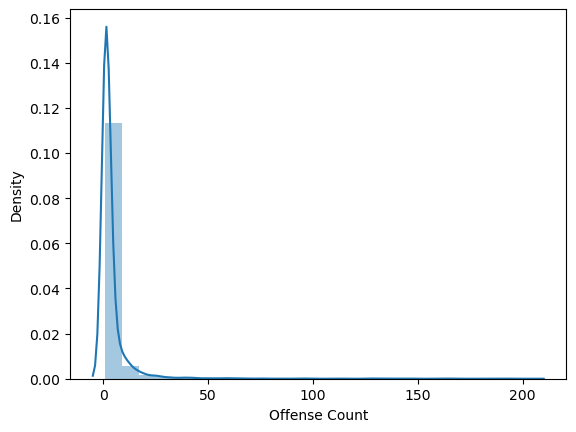

In [35]:
sns.distplot(dfsub['Offense Count'], bins=25)

In [37]:
dfsub[dfsub['Offense Count'] >100]

,Year,Agency Type,State,Region,Offense,Offense Subcat,Offense Count
182,2015,0,28,4,0,0,204
341,2016,1,18,2,0,0,114
409,2016,0,28,4,0,0,128
1036,2018,0,28,4,0,0,193
1489,2019,0,28,4,0,0,162
1613,2019,0,43,2,0,0,137
2066,2020,0,28,4,0,0,147
2223,2020,0,43,2,0,0,144
2740,2021,0,28,4,0,0,165
2921,2021,0,43,2,0,0,128


In [38]:
# Check the mean
dfsub['Offense Count'].mean()


3.8605546995377504

In [39]:
# check the median
dfsub['Offense Count'].median()

1.0

In [40]:
# check the max
dfsub['Offense Count'].max()

204

## 3. Exploration for Regression Analysis - Scatterplots

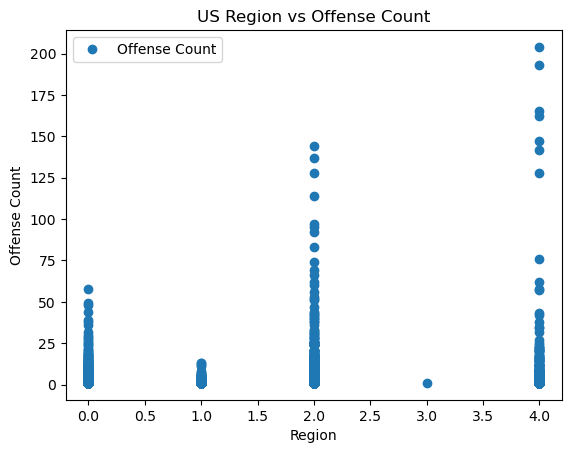

In [41]:
# Create a scatterplot Offense Count vs REgion

dfsub.plot(x = 'Region', y='Offense Count',style='o')
plt.title('US Region vs Offense Count')  
plt.xlabel('Region')  
plt.ylabel('Offense Count')  
plt.show()

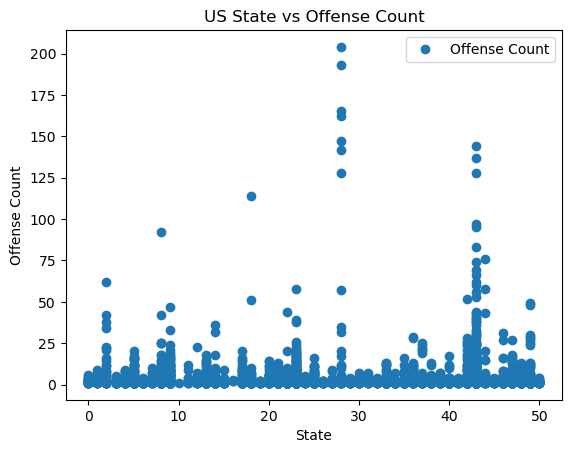

In [42]:
# Create a scatterplot Offense Count vs State

dfsub.plot(x = 'State', y='Offense Count',style='o')
plt.title('US State vs Offense Count')  
plt.xlabel('State')  
plt.ylabel('Offense Count')  
plt.show()

In [43]:
dfsub.State

0       25
1       35
2       35
3       42
4       42
        ..
3889    50
3890    50
3891    50
3892    50
3893    50
Name: State, Length: 3894, dtype: int8

In [47]:
df.STATE_NAME

0        Missouri
1            Ohio
2            Ohio
3       Tennessee
4       Tennessee
          ...    
3889      Wyoming
3890      Wyoming
3891      Wyoming
3892      Wyoming
3893      Wyoming
Name: STATE_NAME, Length: 3894, dtype: object

### Create a scatterplot and look for variables 

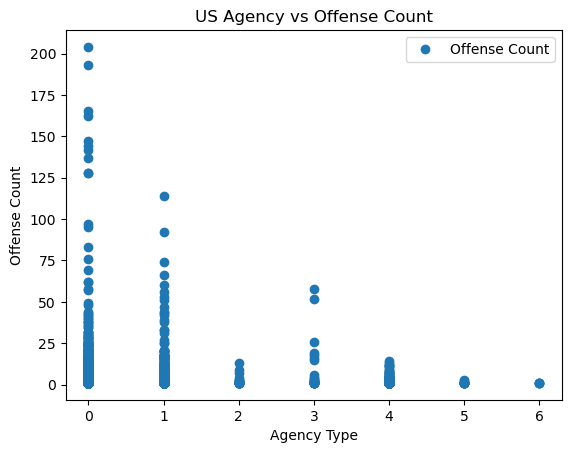

In [48]:
# Create a scatterplot Offense Count vs Agency Type

dfsub.plot(x = 'Agency Type', y='Offense Count',style='o')
plt.title('US Agency vs Offense Count')  
plt.xlabel('Agency Type')  
plt.ylabel('Offense Count')  
plt.show()

#### Working Hypothesis: 

1.	If we could increase encarceration rates and criminal sentencing punishments of people paying for sexual activity and people caught trafficking humans for sexual activity in US cities, we could considerably decrease (and hope to eliminate) the number of people being used for sex trafficking in US cities.

### Reshape variables into NumPy arrays

In [49]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = dfsub['Agency Type'].values.reshape(-1,1)
y = dfsub['Offense Count'].values.reshape(-1,1)

In [50]:
X

array([[1],
       [1],
       [1],
       ...,
       [0],
       [1],
       [1]], dtype=int8)

In [51]:
y

array([[6],
       [1],
       [1],
       ...,
       [1],
       [1],
       [2]], dtype=int64)

### Split data into Training and Test sets

In [52]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### Run Linear Regression of the data 

In [53]:
# Create a regression object.
# This is the regression object, which will be fit onto the training set.
regression = LinearRegression()  

In [54]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [55]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

### Create a plot to show regression line on test set

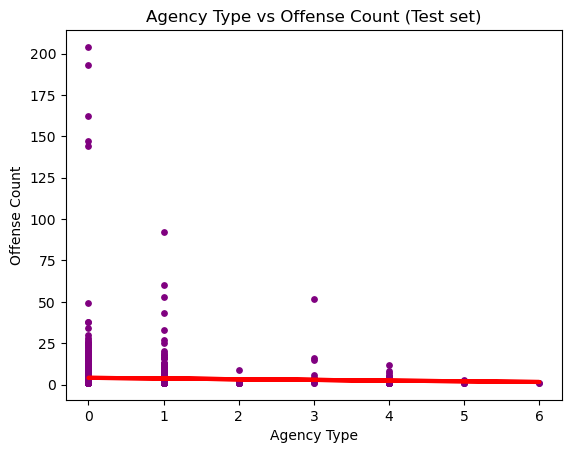

In [57]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='purple', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Agency Type vs Offense Count (Test set)')
plot_test.xlabel('Agency Type')
plot_test.ylabel('Offense Count')
plot_test.show()

### Observations:

The line appears to fit the data but only in the sense that every Agency experienced some level of trafficking (albeit smoe more than others), but the line itself does not show any type of positive or negative regression. If we look closely there is an almost indetectable negative regression. What we CAN see clearly is that certain agencies experince higher volumes of trafficking compared to others.    

### Check model performance statistics

In [58]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [59]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-0.41829802]]
Mean squared error:  157.31949223676685
R2 score:  0.0015818587305543863


In [60]:
y_predicted

array([[2.40577252],
       [2.82407054],
       [4.07896461],
       ...,
       [4.07896461],
       [3.66066658],
       [3.66066658]])

In [61]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(40)

,Actual,Predicted
0,1,2.405773
1,2,2.824071
2,2,4.078965
3,1,3.660667
4,1,4.078965
5,1,4.078965
6,1,4.078965
7,15,2.824071
8,1,3.660667
9,1,4.078965


### Compare predicted y with actual y 

In [62]:
 # This predicts X_train
    
y_predicted_train = regression.predict(X_train)

In [63]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [64]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-0.41829802]]
Mean squared error:  88.31130287849362
R2 score:  0.002617323714445674


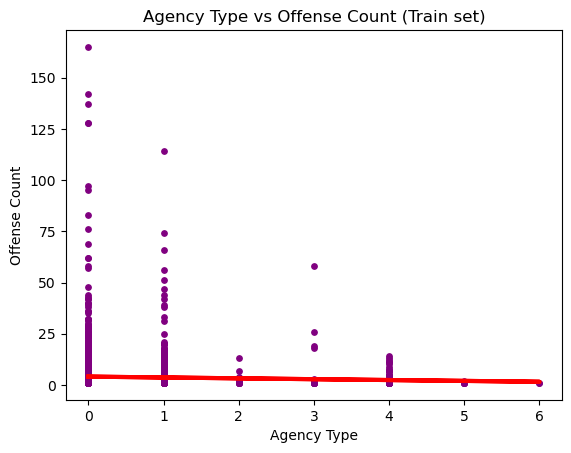

In [66]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='purple', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Agency Type vs Offense Count (Train set)')
plot_test.xlabel('Agency Type')
plot_test.ylabel('Offense Count')
plot_test.show()

## Final Thoughts:

1. The R2 socre for my model was .0015 (actual  .0026). This clearly shows that my model is not a great fit.
2. We can see that there is a substantial difference between my predicted y values and my actual y values, which adds to the conclusion that my model is not working well enough to explain a relationship between Agency Type and Offense Count. 
3. Although my model has been proven to be inaccurate, it does not completely disprove my hypothesis: 
###### If we could increase encarceration rates and criminal sentencing punishments of people paying for sexual activity and people caught trafficking humans for sexual activity in US cities, we could considerably decrease (and hope to eliminate) the number of people being used for sex trafficking in US cities.
4. A new hypothesis that we could arrive at, given the data presented, is the following: 
###### The more remote (distance) the Agency involved in aprehending trafficking criminals is, the lower the success rate of arrests.
